In [2]:
import torch
from torchvision import datasets, transforms
from matplotlib import pyplot as plt
import numpy as np
from skimage.color import rgb2gray
from skimage.restoration import wiener
from scipy.stats import multivariate_normal
from scipy.signal import fftconvolve

In [14]:
SIZE = 9

In [3]:
def augument_data(source):
    data = []
    for c in source:
        data.extend([
            c,
            np.rot90(c, np.random.randint(1, 4)),
            np.fliplr(c),
            np.flipud(c)
        ])
    data = np.array(data)
    np.random.shuffle(data)
    return data

In [13]:
def get_gauss_filt(sigma, size=5):
    f = np.vectorize(lambda x, y: multivariate_normal([0.0, 0.0], sigma).pdf([x, y]))
    X, Y = np.meshgrid(np.arange(-size//2, size//2+1, 1, dtype=np.float32), np.arange(-size//2, size//2+1, 1, dtype=np.float32))
    kernel = f(X, Y)
    return kernel / kernel.sum()

def blur(img, kernel):
    img = np.asarray(img)
    if len(img.shape) < 3:
        return fftconvolve(img, kernel, mode='same')
    output = np.zeros_like(img)
    for c in range(img.shape[2]):
        output[:, :, c] = fftconvolve(img[:, :, c], kernel, mode='same')
    return output

    
gauss1 = get_gauss_filt(np.diag([2.0**2]*2), size=SIZE)
gauss2 = get_gauss_filt(np.diag([10**2, 10**2]), size=SIZE)
gauss3 = get_gauss_filt(np.diag([16**2, 2**2]), size=SIZE)

blur_candidate = [gauss1, gauss2, gauss3]

(11, 11)

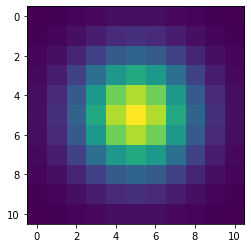

In [7]:
plt.imshow(gauss1)
gauss1.shape

In [15]:
mnist = datasets.MNIST(root='./data', train=True, download=True)
n = 1000
np.random.seed(0)
idx = np.random.choice(mnist.data.shape[0], n)

imgs = []
for i in idx:
    d, _ = mnist[i]
    d = d.resize((500, 500))
    img = np.asarray(d)
    imgs.append(img/255)
imgs = np.array(imgs)
imgs.shape

(1000, 500, 500)

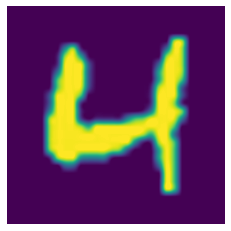

(500, 500)


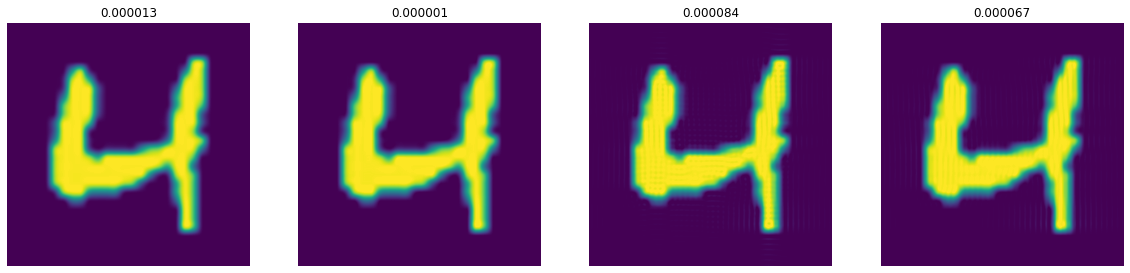

(500, 500)


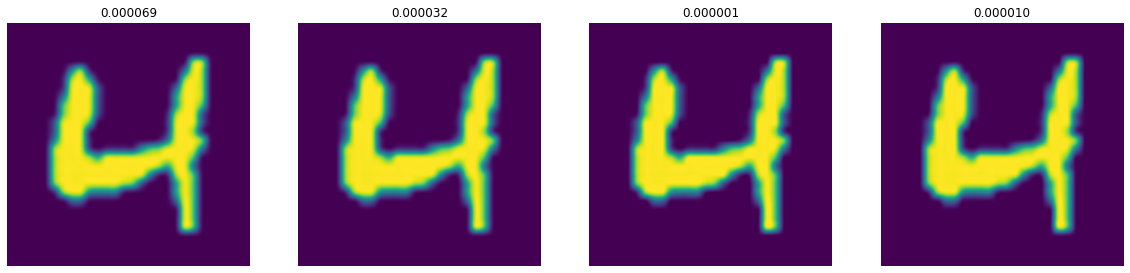

(500, 500)


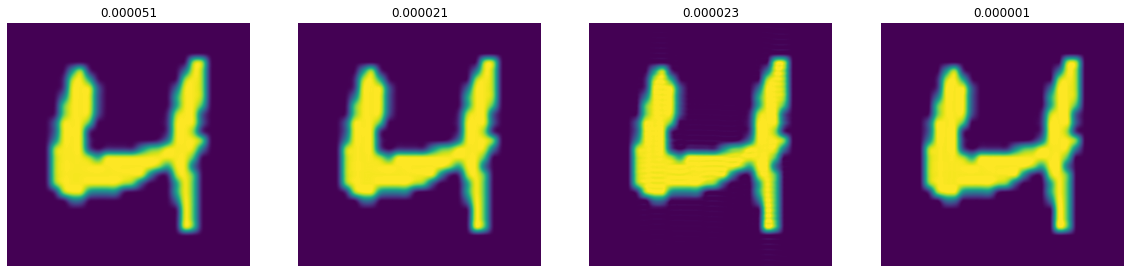

In [8]:
original = imgs[0]
plt.imshow(original)
plt.axis('off')
plt.show()

WIDTH = 4
for i, filt in enumerate(blur_candidate):
    low = fftconvolve(original, filt, mode='same')
    plt.figure(figsize=(20, 16))
    plt.subplot(1, WIDTH, 1)
    plt.title('%lf'% np.mean((low-original)**2))
    plt.imshow(low)
    plt.axis('off')
    print(low.shape)
    
    high1 = np.maximum(0, wiener(low, gauss1, 1e-2))
    plt.subplot(1, WIDTH, 2)
    plt.title('%lf'%np.mean((high1-original)**2))
    plt.imshow(high1)
    plt.axis('off')
    
    high2 = np.maximum(0, wiener(low, gauss2, 1e-2))
    plt.subplot(1, WIDTH, 3)
    plt.title('%lf'%np.mean((high2-original)**2))
    plt.imshow(high2)
    plt.axis('off')
    
    high3 = np.maximum(0, wiener(low, gauss3, 1e-2))
    plt.subplot(1, WIDTH, 4)
    plt.title('%lf'%np.mean((high3-original)**2))
    plt.imshow(high3)
    plt.axis('off')

    plt.show()

### 以下超解像モデルとデータの調査

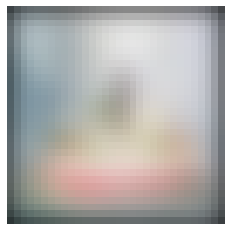

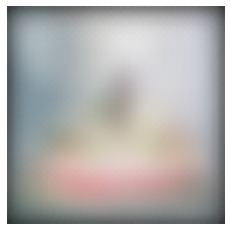

In [10]:
from ISR.models import RDN, RRDN
model = RRDN(weights='gans')
sr_img = model.predict(samples[0])

plt.imshow(samples[0])
plt.axis('off')
plt.show()
plt.imshow(sr_img)
plt.axis('off')
plt.show()

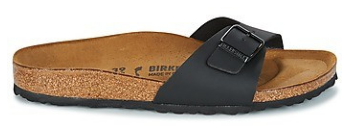

(124, 350, 3)
37.75912442396314


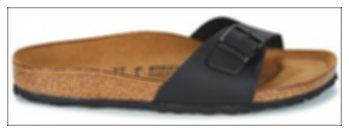

In [15]:
from PIL import Image

img = Image.open('data/sample/sandal.jpg')
img = np.asarray(img)
plt.imshow(img)
plt.axis('off')
plt.show()


lr_img = blur(img, gauss1)
print(lr_img.shape)
print(np.mean((img-lr_img)**2))
plt.imshow(lr_img)
plt.axis('off')
plt.show()

In [16]:
sr_img = model.predict(lr_img)
print(sr_img.shape)
print(np.mean((img-sr_img)**2))
plt.imshow(sr_img)
plt.axis('off')
plt.show()

(496, 1400, 3)


ValueError: operands could not be broadcast together with shapes (124,350,3) (496,1400,3) 

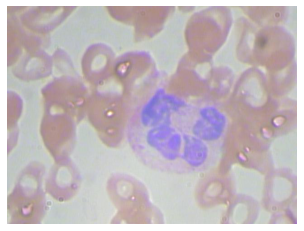

In [27]:
plt.imshow(img)
plt.axis('off')
plt.show()

In [1]:
# NISC

(480, 520)


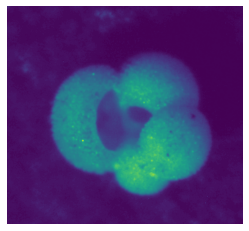

In [7]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
img = Image.open('NCSU-CUB_Foram_Images_G-bulloides/02-24-17_Trial_1 G. Bulloides OOP 552A 7-9 cm 250-355 micro/imgray_1.png')
img = np.asarray(img)
print(img.shape)
plt.imshow(img)
plt.axis('off')
plt.show()

In [8]:
from glob import glob
len(glob('NCSU-CUB_Foram_Images_G-bulloides/02-24-17_Trial_1 G. Bulloides OOP 552A 7-9 cm 250-355 micro/*'))

16

In [1]:
import csv
with open('Mitra-etal_2019.tab', 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    data = list(reader)
for i, row in enumerate(data):
    print(i)
    print(row)
    print()

0
['/* DATA DESCRIPTION:']

1
['Citation:', 'Mitra, Ritayan; Marchitto, Thomas M; Ge, Qian; Zhong, Boxuan; Lobaton, Edgar (2019): Foraminifera optical microscope images with labelled species and segmentation labels. PANGAEA, https://doi.org/10.1594/PANGAEA.897873']

2
['Abstract:', 'The dataset contains foraminifera images of over 1,000 forams taken under 16 different lighting directions with an optical microscope. The species and locations of the samples are also specified. It also contains manual segmentation of over 400 samples from the images described above. The segmentation labels are matched by their name.']

3
['', 'To capture these images, a visual identification system was developed in order to automate the identification of target microorganisms. The visual system incorporates a controllable LED lighting ring used to capture images by illuminating the specimens from several directions, mimicking an important step in the traditional identification process.']

4
['', 'The data

In [2]:
image_info = data[19:]
image_info[0]

['Globigerina bulloides',
 'NCSU-CUB_Foram_Images_01_G-bulloides.zip',
 'ZIP',
 '255140.969',
 'https://hs.pangaea.de/Images/Documentation/MitraR-etal_2019/NCSU-CUB_Foram_Images_01_G-bulloides.zip']

In [3]:
import os
import requests as req
os.makedirs('./data_as_zip', exist_ok=True)

for i, info in enumerate(image_info):
    res = req.get(info[-1])
    with open('./data_as_zip/data%d.zip' % i, 'wb') as f:        
        f.write(res.content)

In [4]:
import zipfile
images = []
for i in range(8):
    with zipfile.ZipFile('data_as_zip/data%d.zip' % i) as ezip:
        ezip.extractall('*')

In [20]:
from pathlib import Path
from PIL import Image
import numpy as np
path = Path('data/NCSU-CUB_Foram_Images_G-bulloides')
images = []
print(list(list(path.glob('*'))[20].glob('*'))[0])

print()
unique = set()
for i, file in enumerate(path.glob('*')):
    p = list(file.glob('*.png'))[0]
    img = Image.open(str(p))
    img = np.asarray(img)

    if img.shape[0] == 360 or img.shape[1]==360:
        print(i)
    unique.add(img.shape)
    images.append(img)

data/NCSU-CUB_Foram_Images_G-bulloides/03-31-17_Trial_6 G. Bulloides OOP 552A 7-9 cm 250-355 micro/imgray_10.png

5
8
47
56
59
90


(480, 560)

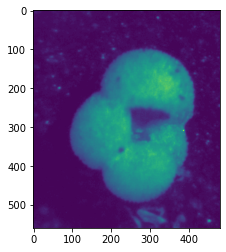

In [12]:
from matplotlib import pyplot as plt
plt.imshow(images[1])
images[1].size

(480, 480)


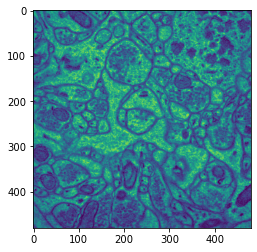

In [43]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
img = Image.open('EM/LR/LR_EM_1.tif')
print(np.asarray(img).shape)
plt.imshow(img)
plt.show()